In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [2]:
model = load_model("weights.40-0.96.hdf5")

In [3]:
import cv2
from tqdm import tqdm

In [4]:
def read_img(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (224,224))
    return img

In [5]:
test_path = "Final_test//"

In [6]:
import pandas as pd
test = pd.read_csv(test_path+"test.csv")

In [7]:
test

,FileName
0,img011-001.png
1,img012-003.png
2,img013-009.png
3,img015-001.png
4,img015-051.png
5,img017-003.png
6,img019-006.png
7,img020-023.png
8,img022-043.png
9,img023-048.png


In [8]:
test_img = []

for img_path in tqdm(test['FileName'].values):
    test_img.append(read_img(test_path + img_path))

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 59.30it/s]


In [9]:
from PIL import Image
import numpy as np

In [10]:
x_test = np.array(test_img, np.float32) / 255.

In [11]:
x_test.shape

(15, 224, 224, 3)

In [12]:
import matplotlib.pyplot as plt

In [19]:
def show_images(ix):
    image_test = read_img(test_path + test.FileName[ix])
    
    plt.figure(figsize = (1,1))
    plt.imshow(image_test)
    
# 15 images in train and test set
for idx in range(15):
    show_images(idx)

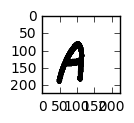

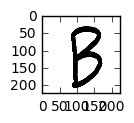

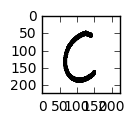

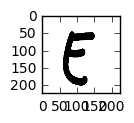

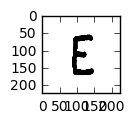

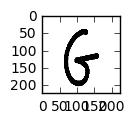

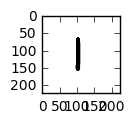

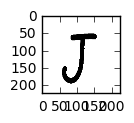

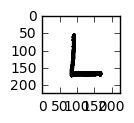

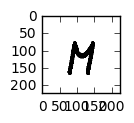

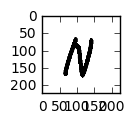

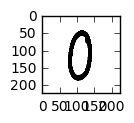

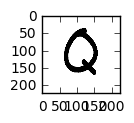

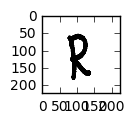

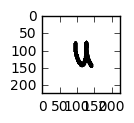

In [20]:
plt.show()

In [15]:
pred = model.predict_classes(x_test)

15/15 [==============================] - 0s


In [16]:
pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)